## Objective
Implement a Generative Adversarial Network to generate random new realistic images of clothing apparels by training it on fasion-MNIST dataset from keras.

In [2]:
# Importing Required Libraries
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import layers
import matplotlib.pyplot as plt

In [3]:
# Loading the "fashion-mnist" data from keras
from keras.datasets import fashion_mnist

(X_train,y_train),(X_test,y_test) =fashion_mnist.load_data()
X=np.concatenate([X_train,X_test],axis=0)
X= np.expand_dims(X,-1).astype('float32')/255

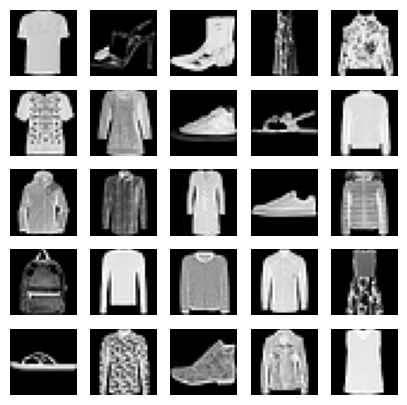

In [4]:
# Sample a few fashion MNIST images from the data and view the images
indices = np.random.randint(0,X.shape[0],size=25)

images =X[indices]

plt.figure(figsize=(5,5))

for i in np.arange(0,len(indices),1):
    plt.subplot(5,5,i+1)
    image=images[i]
    plt.imshow(image,cmap='gray')
    plt.axis('off')

In [5]:
# Shape of data
X.shape

(70000, 28, 28, 1)

## Building GAN

### Generator

In [8]:
def build_generator(latent_dim =1):
    G = keras.models.Sequential([layers.Dense(28*28*256,use_bias=False,input_shape=(latent_dim,)),
                                layers.BatchNormalization(),
                                layers.LeakyReLU(),
                                layers.Reshape((28,28,256)),
                                layers.Conv2DTranspose(filters=128,kernel_size=3,strides=1,use_bias=False,padding='same'),
                                layers.BatchNormalization(),
                                layers.LeakyReLU(),
                                layers.Conv2DTranspose(filters=64,kernel_size=3,strides=1,use_bias=False,padding='same'),
                                layers.BatchNormalization(),
                                layers.LeakyReLU(),
                                layers.Conv2DTranspose(filters=32,kernel_size=3,strides=1,use_bias=False,padding='same'),
                                layers.BatchNormalization(),
                                layers.LeakyReLU(),
                                layers.Conv2DTranspose(filters=1,kernel_size=3,strides=1,use_bias=False,padding='same')])
    return G

### Discriminator

In [10]:
def build_discriminator():
    D = keras.models.Sequential([layers.Conv2D(filters=32,kernel_size=3,strides=1,use_bias=False,padding='same',input_shape=(28,28,1)),
                                layers.LeakyReLU(),
                                layers.Dropout(rate=0.3),
                                layers.Conv2D(filters=64,kernel_size=3,strides=1,use_bias=False,padding='same'),
                                layers.LeakyReLU(),
                                layers.Dropout(rate=0.3),
                                layers.Conv2D(filters=64,kernel_size=3,strides=1,use_bias=False,padding='same'),
                                layers.LeakyReLU(),
                                layers.Dropout(rate=0.3),
                                layers.Flatten(),
                                layers.Dense(units=1,use_bias=False)])
    return D

In [11]:
latent_dim=4

generator =build_generator(latent_dim=latent_dim)
generator.summary()

C:\Users\habraham\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 200704)         │       802,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 200704)         │       802,816 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 200704)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose                │ (None, 28, 28, 128)    │       294,912 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 28, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_1              │ (None, 28, 28, 64)     │        73,728 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 28, 28, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_2              │ (None, 28, 28, 32)     │        18,432 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_3              │ (None, 28, 28, 1)      │           288 │
│ (Conv2DTranspose)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,993,888 (7.61 MB)

 Trainable params: 1,592,032 (6.07 MB)

 Non-trainable params: 401,856 (1.53 MB)

In [12]:
discriminator =build_discriminator()
discriminator.summary()

C:\Users\habraham\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_4 (LeakyReLU)       │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 64)     │        18,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_5 (LeakyReLU)       │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 64)     │        36,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_6 (LeakyReLU)       │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 50176)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │        50,176 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 105,760 (413.12 KB)

 Trainable params: 105,760 (413.12 KB)

 Non-trainable params: 0 (0.00 B)

## Training the Network

In [14]:
# Defining loss functions
cross_entropy =keras.losses.BinaryCrossentropy(from_logits=True)
def discriminator_loss(real_output,fake_output):
    real_loss =cross_entropy(tf.ones_like(real_output),real_output)
    fake_loss =cross_entropy(tf.ones_like(fake_output),fake_output)
    total_loss =real_loss + fake_loss
    return total_loss
def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output),fake_output)

In [15]:
# Define the optimisers
generator_optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005)
discriminator_optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005)

In [16]:
batch_size=64
epochs=5

In [17]:
# Define the training step
@tf.function
def train_step(images=None, batch_size=1,latent_dim=1):
    noise =tf.random.normal([batch_size,latent_dim])
    with tf.GradientTape() as gen_tape, tf.GradientTape() as dis_tape:
        generated_images =generator(noise,training=True)
        real_output=discriminator(images,training=True)
        fake_output=discriminator(generated_images,training=True)
        gen_loss =generator_loss(fake_output)
        disc_loss=discriminator_loss(real_output,fake_output)
    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = dis_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

In [ ]:
# Run the training loop
n_batches = X.shape[0] // batch_size
loss_comps = epochs * n_batches
i = 0
for epoch in range(epochs):
    for batch in range(n_batches):
        i = i + 1
        print('Parameter updates using loss computation number {} out of {} computations...'.format(i, loss_comps))
        batch_images = X[batch * batch_size : (batch + 1) * batch_size]
        train_step(images = batch_images, batch_size = batch_size, latent_dim = latent_dim)

Parameter updates using loss computation number 1 out of 5465 computations...
Parameter updates using loss computation number 2 out of 5465 computations...
Parameter updates using loss computation number 3 out of 5465 computations...
Parameter updates using loss computation number 4 out of 5465 computations...
Parameter updates using loss computation number 5 out of 5465 computations...
Parameter updates using loss computation number 6 out of 5465 computations...
Parameter updates using loss computation number 7 out of 5465 computations...
Parameter updates using loss computation number 8 out of 5465 computations...
Parameter updates using loss computation number 9 out of 5465 computations...
Parameter updates using loss computation number 10 out of 5465 computations...
Parameter updates using loss computation number 11 out of 5465 computations...
Parameter updates using loss computation number 12 out of 5465 computations...
Parameter updates using loss computation number 13 out of 546

## Generating Images

In [ ]:
n_new=25
# Generate some new images using the generator
noise = tf.random.normal([n_new, latent_dim])
generated_images = generator(noise, training = False)

# Rescale the image gray levels to [0, 1]
generated_images = 0.5 * generated_images + 0.5

plt.figure(figsize = (5, 5))

for i in range(n_new):
    plt.subplot(int(np.sqrt(n_new)), int(np.sqrt(n_new)), i + 1)
    plt.imshow(generated_images[i, :, :, 0], cmap = 'gray')

plt.axis('off')
plt.show()